<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/DimensionalityReduction_PCA_IrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

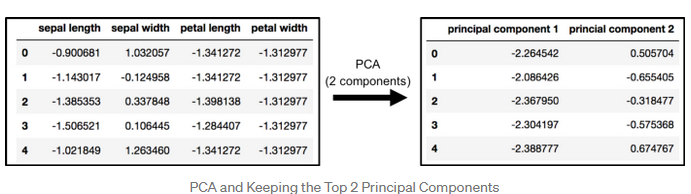

data- iris data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##Clean, Encode and Scale data

In [3]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [4]:
x=df.drop(columns=['species'])
y=df['species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

##Fit PCA and find components

In [10]:

pca=PCA()
xtrain=pca.fit_transform(xtrain)
xtest=pca.fit_transform(xtest)
time1 =datetime.datetime.now()
model=LogisticRegression()
model.fit(xtrain,ytrain)
time2 =datetime.datetime.now()
print(time2-time1)

Start time : 2021-08-29 05:07:43.319916
Start time : 2021-08-29 05:07:43.333483
0:00:00.014213


In [11]:
ypred=model.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,ypred))
print("\nReport :\n",classification_report(ytest,ypred))

Accuracy :  0.7666666666666667

Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



In [12]:
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.22044605e-16,
         9.83538362e-17],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
        -1.22942295e-17],
       [ 0.00000000e+00, -9.83538362e-17,  1.22942295e-17,
         1.00000000e+00]])

In [13]:
pca.explained_variance_ratio_

array([0.77223038, 0.1654295 , 0.05503624, 0.00730387])

([<matplotlib.axis.XTick at 0x7fd60c935a90>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')])

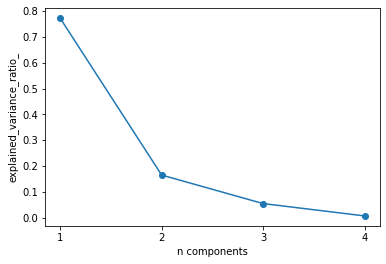

In [14]:
plt.plot(pca.explained_variance_ratio_,marker="o")
plt.xlabel("n components")
plt.ylabel("explained_variance_ratio_")
plt.xticks([0,1,2,3],["1","2","3","4"])


**Conclusion :** principal components are observed at 3

In [22]:
pca=PCA(n_components=2)
xtrain=pca.fit_transform(xtrain)
xtest=pca.fit_transform(xtest)

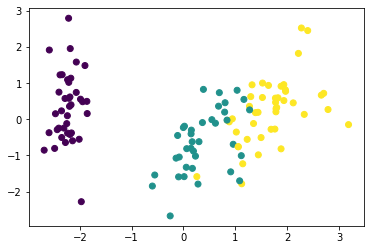

In [23]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)

In [24]:
model=LogisticRegression()
time1 =datetime.datetime.now()
model.fit(xtrain,ytrain)
time2 =datetime.datetime.now()
print(time2-time1)

0:00:00.008254


Conclusion : We can observe decreased time span after dimensionality reduction.

In [16]:
ypred=model.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,ypred))
print("\nReport :\n",classification_report(ytest,ypred))

Accuracy :  0.7666666666666667

Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30

